# 11.a)

8 bit bir resimg_orgg_org içerisinde tespit etmek istenilen bir detay seçip, korelasyon filtresi ile tespit edin.

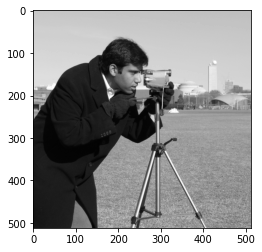

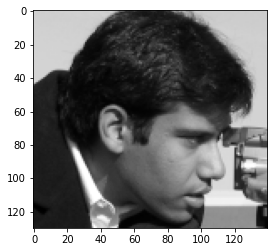

In [ ]:
import matplotlib.pyplot as plt
from skimage import data 
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pylab as plt
from skimage.draw import rectangle_perimeter

img_org = data.camera() 
plt.imshow(img_org, cmap='gray')
plt.show() 

## template matching
template = img_org[70:200, 140:280]
plt.imshow(template, cmap='gray') 
plt.show()

70 140


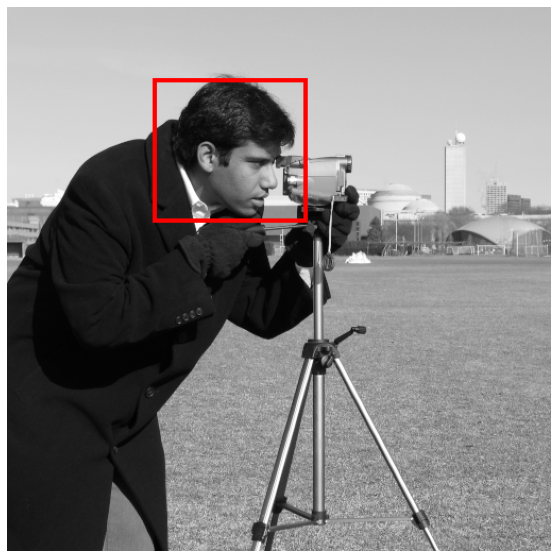

In [ ]:
im = data.camera()
template = img_org[70:200, 140:280]

# FFT 
F = fp.fftn(im)                   
F_tm = fp.fftn(template, shape=im.shape)

# compute the best match location
F_cc = F * np.conj(F_tm)
c = (fp.ifftn(F_cc/np.abs(F_cc))).real
i, j = np.unravel_index(c.argmax(), c.shape)
print(i, j)

im2 = (gray2rgb(img_org)).astype(np.uint8)
rr, cc = rectangle_perimeter((i,j), 
            end=(i + template.shape[0], j + template.shape[1]), shape=im.shape)
for x in range(-2,2):
    for y in range(-2,2):
        im2[rr + x, cc + y] = (255,0,0)


# show the output image
plt.figure(figsize=(10,10))
plt.imshow(im2)
plt.axis('off')
plt.show()